**PART 2**
This part covers the Exercise 2 of Week 8

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import math
from statistics import mean

In [ ]:
df = pd.DataFrame({
    'var1':[1,1.5,3,5,3.5,4.5,3.5],
    'var2':[1,2,4,7,5,5,4.5]
})
rowCount = df.shape[0]
df

,var1,var2
0,1.0,1.0
1,1.5,2.0
2,3.0,4.0
3,5.0,7.0
4,3.5,5.0
5,4.5,5.0
6,3.5,4.5


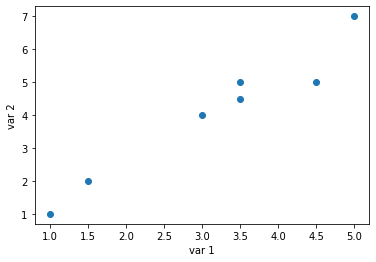

In [ ]:
plt.scatter(df.var1,df.var2)
plt.xlabel('var 1')
plt.ylabel('var 2')
plt.show()

In [ ]:
#declare initial centroid
ic = []
ic.append((2,2))
ic.append((5,7))
#declare centroids
m1 = []
m2 = []
#declare cluster
clusters = []

In [ ]:
def clearList():
  #reset the list empty to make it reusable
  m1.clear()
  m2.clear()
  clusters.clear()

def calculateDistance(df,c):
  #find first centroid
  i=0
  while i<rowCount: #iterate through each row
  #get coordinates 
   x1 = df.var1[i]
   y1 = df.var2[i]
   x2 = c[0][0]
   y2 = c[0][1]
   x3 = c[1][0]
   y3 = c[1][1]
   #Calculate manhattan distance
   p1 = (abs(x2-x1)+abs(y2-y1))
   p2 = (abs(x3-x1)+abs(y3-y1))
   round(p1,2)
   round(p2,2)
   p = [p1,p2]
   clusters.append(findMinDistanceCluster(p)) #compare the distances and select the smallest one
   m1.append(p1)
   m2.append(p2)
   
   i+=1
  #create columns based on list
  df['m1'] = m1
  df['m2'] = m2
  df['cluster'] = clusters

  return df


def findMinDistanceCluster(p):
  lowestVal = min(p) #get the lowest value
  
  i = 0
  while i<len(p): #iterate through each
    if p[i] == lowestVal:
      return i+1 #assign cluster number of the same distance
    i+=1

def calculateCentroid(df):
  #create variables for x,y and number of data
  x_val1 = 0
  y_val1= 0
  x_val2 = 0
  y_val2= 0
  
  num1 = 0
  num2 = 0
  
#find the sum and len of x and y values
  for i in df.index:
   if df.cluster[i] == 1:
    x_val1+= df.var1[i]
    y_val1+= df.var2[i]
    num1+=1
    
   elif df.cluster[i] == 2:
    x_val2+= df.var1[i]
    y_val2+= df.var2[i]
    num2+=1
   
#calculate the new cluster centrals
  cx1 = round(x_val1/num1,2)
  cy1 = round(y_val1/num1,2)
  cx2 = round(x_val2/num2,2)
  cy2 = round(y_val2/num2,2)
 

  clearList()

  cl = [] #list for new cluster central
  #add the new cluster centrals to the list
  cl.append((cx1,cy1))
  cl.append((cx2,cy2))
  

  return cl
  



  


1st Calculation

In [ ]:
df1 = calculateDistance(df,ic)

In [ ]:
df1

,var1,var2,m1,m2,cluster
0,1.0,1.0,2.0,10.0,1
1,1.5,2.0,0.5,8.5,1
2,3.0,4.0,3.0,5.0,1
3,5.0,7.0,8.0,0.0,2
4,3.5,5.0,4.5,3.5,2
5,4.5,5.0,5.5,2.5,2
6,3.5,4.5,4.0,4.0,1


2nd Calculation

In [ ]:
cl = calculateCentroid(df1)

In [ ]:
df2 = calculateDistance(df1,cl)
df2

,var1,var2,m1,m2,cluster
0,1.0,1.0,3.13,8.00,1
1,1.5,2.0,1.63,6.50,1
2,3.0,4.0,1.87,3.00,1
3,5.0,7.0,6.87,2.00,2
4,3.5,5.0,3.37,1.50,2
5,4.5,5.0,4.37,0.84,2
6,3.5,4.5,2.87,2.00,2


3rd Calculation

In [ ]:
cl = calculateCentroid(df2)
print(cl)

[(1.83, 2.33), (4.12, 5.38)]


In [ ]:
df3 = calculateDistance(df2,cl)
df3

,var1,var2,m1,m2,cluster
0,1.0,1.0,2.16,7.50,1
1,1.5,2.0,0.66,6.00,1
2,3.0,4.0,2.84,2.50,2
3,5.0,7.0,7.84,2.50,2
4,3.5,5.0,4.34,1.00,2
5,4.5,5.0,5.34,0.76,2
6,3.5,4.5,3.84,1.50,2


4th Calculation

In [ ]:
cl = calculateCentroid(df3)
df4 = calculateDistance(df3,cl)
df4

,var1,var2,m1,m2,cluster
0,1.0,1.0,0.75,7.0,1
1,1.5,2.0,0.75,5.5,1
2,3.0,4.0,4.25,2.0,2
3,5.0,7.0,9.25,3.0,2
4,3.5,5.0,5.75,0.5,2
5,4.5,5.0,6.75,0.7,2
6,3.5,4.5,5.25,1.0,2


No change in the cluster assignment, algorithm stops

Plot the data in x and y axis, and make the circles show final clusters

In [ ]:
#Declare a list for centroids
fc1 = []
fc2 = []
#Put final centroids into a list
i=0
while i<len(cl):
  fc1.append(cl[i][0])
  fc2.append(cl[i][1])
  i+=1

#Make dataframe of centroids from centroid list
df_centroids = pd.DataFrame({
    'var1':fc1,
    'var2':fc2
})

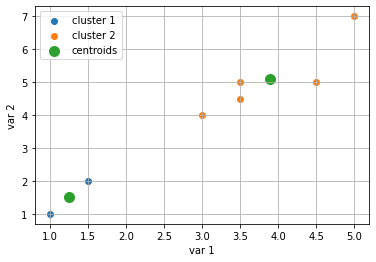

In [ ]:
#group the plot data
plot1 = df4[df4['cluster']==1]
plot2 = df4[df4['cluster']==2]
#plot the data
plt.scatter(plot1.var1,plot1.var2,label='cluster 1')
plt.scatter(plot2.var1,plot2.var2,label='cluster 2')
plt.scatter(df_centroids.var1,df_centroids.var2,label='centroids',s=100)
#label the axis
plt.xlabel('var 1')
plt.ylabel('var 2')
plt.legend()
#show the plotting
plt.grid()